In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

from IPython.display import display

# Data

In [2]:
"""
    Loading the data.
"""

url = "https://raw.githubusercontent.com/hgkahng/ml-datasets/main/binary-classification/heart-disease/heart.csv"
data = pd.read_csv(url)
print(f"Data has {data.shape[0]} rows and {data.shape[1]} columns.")

Data has 303 rows and 14 columns.


In [3]:
display(data)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
"""
    Create dummies for one-hot encoding categorical variables
    with more than 2 classes.
"""
data_with_dummies = pd.get_dummies(data, columns=['cp', 'restecg', 'thall'])

In [5]:
display(data_with_dummies)

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,...,1,0,0,1,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,...,1,0,0,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,...,0,0,0,0,1,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,1,0,...,0,0,1,0,1,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,1,2,...,0,0,0,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,1,...,0,0,0,0,1,0,0,0,0,1


In [6]:
n = len(data)                 # 303
total_indices = np.arange(n)  # [0, 1, 2, ..., 302]

In [7]:
"""
    Split the data into train (60%) / validation (20%) / test (20%) sets.
"""

# 20% as test data
other_indices, test_indices = train_test_split(
    total_indices,
    test_size=0.2,
    random_state=42,
)

# 70% as training data, 10% as validation data (to select the best k)
train_indices, val_indices = train_test_split(
    other_indices,
    train_size=6/8,
    random_state=42,
)

# Use all columns except for 'diagnosis' as explanatory variables (X)
X = data_with_dummies.drop('output', axis=1)

# Use the 'diagnosis' column as the response variable (Y)
y = data_with_dummies['output']

# Get training data (70%)
X_train = X.iloc[train_indices]
y_train = y[train_indices]

# Get validation data (10%)
X_val = X.iloc[val_indices]
y_val = y[val_indices]

# Get testing data (20%)
X_test = X.iloc[test_indices]
y_test = y[test_indices]

# Random Forest

In [8]:
train_accs = []
validation_accs = []
test_accs = []
oob_accs = []

n_estimators_list = list(range(10, 301, 10))  # 10, 20, ..., 290, 300

for n_est in n_estimators_list:

    # create model
    rf = RandomForestClassifier(n_estimators=n_est,
                                criterion='entropy',
                                max_features='sqrt',
                                oob_score=True)

    # fit model on training data
    rf.fit(X_train, y_train);

    # make predictions
    y_train_pred = rf.predict(X_train)
    y_val_pred = rf.predict(X_val)
    y_test_pred = rf.predict(X_test)

    # evaluate performance
    train_accs += [accuracy_score(y_train, y_train_pred)]
    validation_accs += [accuracy_score(y_val, y_val_pred)]
    test_accs += [accuracy_score(y_test, y_test_pred)]
    oob_accs += [rf.oob_score_]


c:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [9]:
accuracy_table = pd.DataFrame.from_dict(
    {
        'train': train_accs,
        'validation': validation_accs,
        'oob': oob_accs,
        'test': test_accs,
        'n_estimators': n_estimators_list,
    }, orient='columns'
)

In [10]:
display(accuracy_table)

,train,validation,oob,test,n_estimators
0,0.994475,0.786885,0.718232,0.852459,10
1,1.000000,0.819672,0.795580,0.852459,20
2,1.000000,0.786885,0.801105,0.852459,30
3,1.000000,0.770492,0.806630,0.852459,40
4,1.000000,0.786885,0.801105,0.885246,50
5,1.000000,0.786885,0.812155,0.852459,60
6,1.000000,0.803279,0.817680,0.852459,70
7,1.000000,0.786885,0.790055,0.868852,80
8,1.000000,0.786885,0.801105,0.885246,90
9,1.000000,0.803279,0.823204,0.868852,100


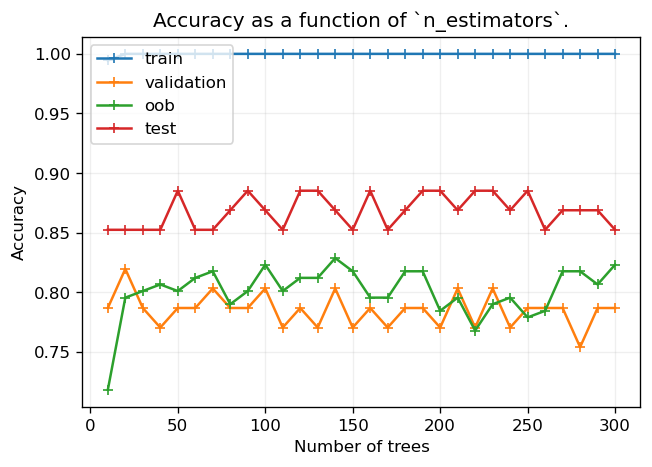

In [11]:
"""
    The effect of number of estimators.
"""

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=120)
accuracy_table.plot(x='n_estimators',
                    y=['train', 'validation', 'oob', 'test'],
                    marker='+',
                    ax=ax)
ax.set_title("Accuracy as a function of `n_estimators`.")
ax.set_xlabel('Number of trees')
ax.set_ylabel('Accuracy')
ax.legend(loc='upper left')
ax.grid(True, alpha=.2)
plt.show(fig)

In [12]:
"""
    Feature importance.
"""


feat_imp_df = pd.DataFrame.from_dict(
    {
        'name': rf.feature_names_in_,
        'importance': rf.feature_importances_
    }, orient='columns'
)

display(feat_imp_df)

,name,importance
0,age,0.090253
1,sex,0.028408
2,trtbps,0.073442
3,chol,0.082326
4,fbs,0.010612
5,thalachh,0.103321
6,exng,0.064550
7,oldpeak,0.116641
8,slp,0.047010
9,caa,0.112868


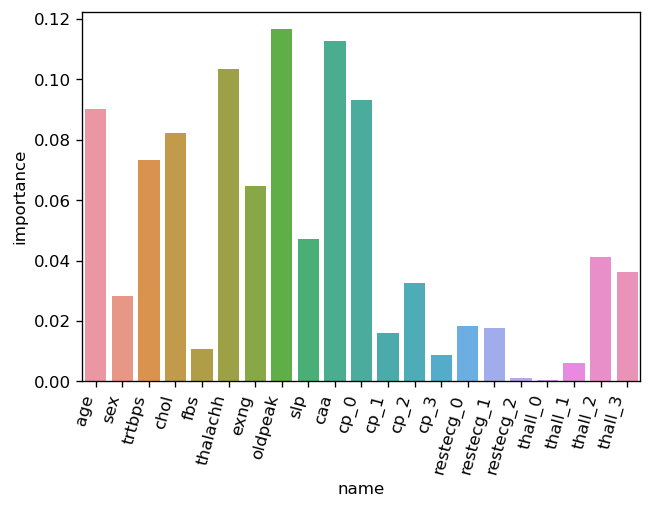

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=120)
sns.barplot(data=feat_imp_df, x='name', y='importance', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=75,
                   horizontalalignment='right')
plt.show(fig)

# Bagging with $k$-NN

In [14]:
# initialize the base estimator
base_estimator = KNeighborsClassifier(n_neighbors=1)

# initialize the Bagging Classifier with the base estimator
bagging_clf = BaggingClassifier(base_estimator,
                                n_estimators=300,
                                bootstrap=True,
                                bootstrap_features=False,
                                oob_score=True,
                                random_state=42)

# fit on training data
bagging_clf.fit(X_train, y_train);

In [15]:
y_test_pred = bagging_clf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.5573770491803278


In [16]:
ks = list(range(1, 21, 2))  # 1, 3, 5, ..., 17, 19


evaluation = {
    'train': [],
    'validation': [],
    'oob': [],
    'test': [],
    'bootstrap_feature': [],
    'k': [],
}

for boot_feat in [False, True]:
    for k in ks:
        bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=k),
                                        n_estimators=100,
                                        bootstrap=True,
                                        bootstrap_features=boot_feat,
                                        oob_score=True,
                                        random_state=42)

        bagging_knn.fit(X_train, y_train)

        y_train_pred = bagging_knn.predict(X_train)
        y_val_pred = bagging_knn.predict(X_val)
        y_test_pred = bagging_knn.predict(X_test)

        evaluation['train'] += [accuracy_score(y_train, y_train_pred)]
        evaluation['validation'] += [accuracy_score(y_val, y_val_pred)]
        evaluation['oob'] += [bagging_knn.oob_score_]
        evaluation['test'] += [accuracy_score(y_test, y_test_pred)]
        evaluation['bootstrap_feature'] += [boot_feat]
        evaluation['k'] += [k]

In [17]:
eval_df = pd.DataFrame(evaluation)
display(eval_df)

,train,validation,oob,test,bootstrap_feature,k
0,1.000000,0.590164,0.602210,0.557377,False,1
1,0.828729,0.606557,0.640884,0.655738,False,3
2,0.784530,0.622951,0.629834,0.655738,False,5
3,0.762431,0.655738,0.646409,0.688525,False,7
4,0.751381,0.622951,0.640884,0.688525,False,9
5,0.751381,0.622951,0.646409,0.672131,False,11
6,0.756906,0.622951,0.640884,0.704918,False,13
7,0.729282,0.622951,0.646409,0.672131,False,15
8,0.718232,0.622951,0.651934,0.688525,False,17
9,0.718232,0.622951,0.657459,0.721311,False,19


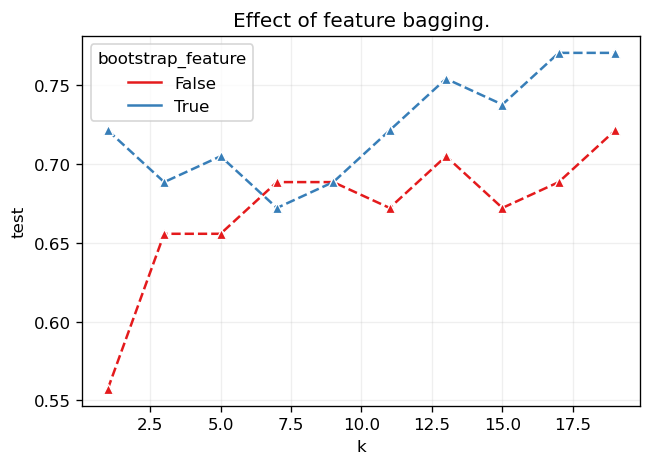

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=120)
sns.lineplot(data=eval_df, x='k', y='test', marker='^',
             hue='bootstrap_feature', palette='Set1', linestyle='--', ax=ax)
ax.set_title("Effect of feature bagging.")
ax.grid(True, alpha=.2)
plt.show(fig)